**Gender Classification Dataset**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
data = pd.read_csv(r'gender_classification_v7.csv')


In [4]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
data.shape

(5001, 8)

In [6]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [8]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [9]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
if 'Male' in data['gender'].unique():
  data['gender'].replace('Male',1,inplace=True)
if 'Female' in data['gender'].unique():
  data['gender'].replace('Female',0,inplace=True)

C:\Users\vansh\AppData\Local\Temp\ipykernel_14908\575828308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace('Male',1,inplace=True)
C:\Users\vansh\AppData\Local\Temp\ipykernel_14908\575828308.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [11]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


Text(0.5, 1.0, 'Correlation Matrix of gender classification')

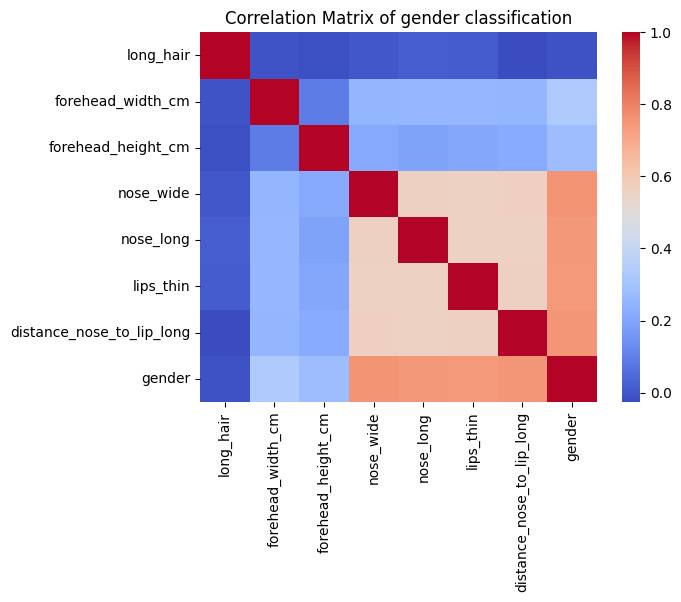

In [12]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Matrix of gender classification')

In [13]:
data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


<Axes: >

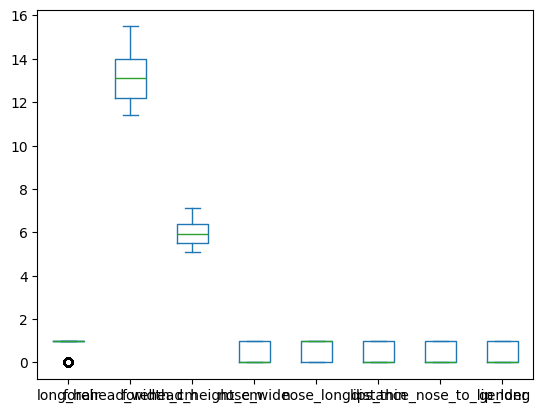

In [14]:
data.plot(kind='box')

**Train The Model**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x= data.drop('gender',axis=1)
y= data['gender']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Random Forest Classification**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [20]:
rem=model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score=accuracy_score(y_test,rem)
print("accuracy score:",accuracy_score*100,"%")

accuracy score: 97.30269730269731 %


In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model1=GaussianNB()
model1.fit(x_train,y_train)

GaussianNB()

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
rem1=model1.predict(x_test)

In [27]:
accuracy_score=accuracy_score(y_test,rem1)
print("accuracy score:",accuracy_score*100,"%")

accuracy score: 97.2027972027972 %


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [29]:
print(accuracy_score(y_test,rem))
print(confusion_matrix(y_test,rem))
print(precision_score(y_test,rem))
print(recall_score(y_test,rem))

0.973026973026973
[[470   7]
 [ 20 504]]
0.9863013698630136
0.9618320610687023


In [30]:
print(accuracy_score(y_test,rem1))
print(confusion_matrix(y_test,rem1))
print(precision_score(y_test,rem1))
print(recall_score(y_test,rem1))

0.972027972027972
[[469   8]
 [ 20 504]]
0.984375
0.9618320610687023


In [31]:
import pickle

with open('gender_classification_model.pkl', 'wb') as file:
    pickle.dump(model,file)